### Fast Fourier Transform (FFT) based denoising
* The following python code will show how to use FFT to remove noise in the signal in Python.

In [1]:
#Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import math

#### Create arbitrary signal
    * The arbitrary signal is the sum of 3 sinusoidal waves with different frequencies - 50Hz, 100Hz and 150Hz.
    * After that, Gaussian noise is added to that signal

In [2]:
# Sampling period (sample spacing in time)
dt = 0.001
# Create time array from 0s to 1s
t = np.arange(0,1.024,dt)
# Create sinusoidal signal consisting of 50Hz, 100Hz, and 150Hz
sig = 1.3*np.sin(2*np.pi*50*t) + 1.0*np.sin(2*np.pi*100*t) + 1.0*np.sin(2*np.pi*150*t)
sig_clean = sig.copy()
# Add Gaussian noise to the signal
sig = sig + 2.5*np.random.randn(len(t))

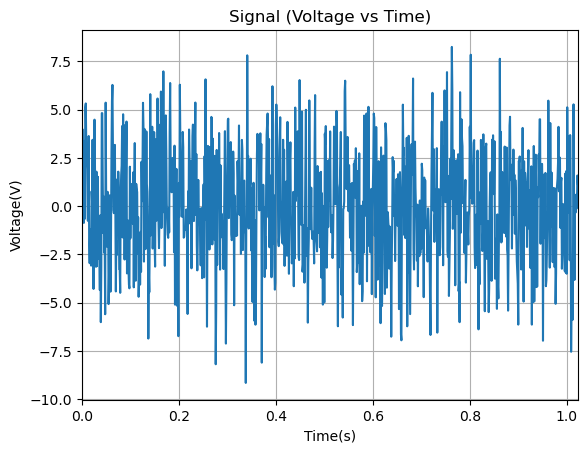

In [3]:
# Plot the time domain signal
plt.figure()
plt.plot(t, sig)
plt.xlim(t[0], t[-1])
plt.title("Signal (Voltage vs Time)")
plt.xlabel("Time(s)")
plt.ylabel("Voltage(V)")
plt.grid()

* The above figure shows the arbitrary signal consisting of 3 different sinusoidal waves and noise. 

#### Compute Fast Fourier Transform, 
    * FFT will help us to observe what frequency components contain in the signal.

In [4]:
# Calculate next power of 2
'''
    This function calculates a positive integer scalar for the transform length, which can improve the performance of FFT. 
    Input argument - 
        * Length of signal (int)
    Output argument - 
        * Lenght of FFT transformed signal.
'''
def next_power_of_2(signal_length):
    return 2**math.ceil(math.log2(signal_length))

In [5]:
# Get the Lenght of signal
N = len(sig)
# Calculate the transform length for FFT
nfft = next_power_of_2(N)
# Compute FFT
Yf = np.fft.fft(sig, nfft)
# Calculate Power Spectrum Density (Power per frequency)
psd = np.abs(Yf * np.conj(Yf))/nfft
# Frequency array
xf = np.fft.fftfreq(nfft, dt)
# To plot first half of the FFT
L = np.arange(1, np.floor(nfft/2), dtype='int')


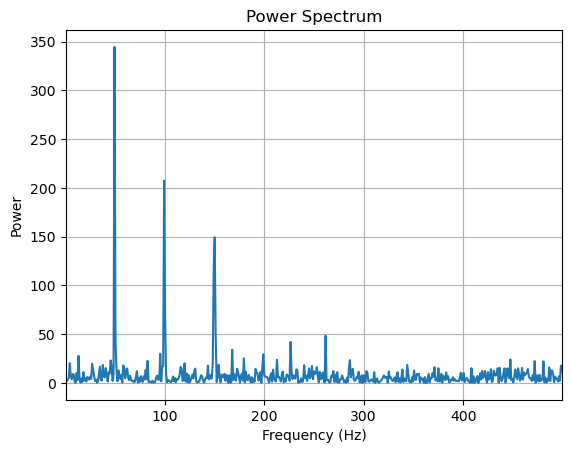

In [7]:
plt.figure()
plt.plot(xf[L], psd[L])
plt.title("Power Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.xlim(xf[L[0]], xf[L[-1]])
plt.grid()

* The above power spectrum shows the power as a function of frequency. It has x-axis in hertz and y-axis tells how much power in each of those frequency in the signal.
* Although the time domain signal is noisy, the power spectrum tells us that it contains most of the power at 50Hz, 100Hz and 150Hz. Among them, 50Hz signal contains the highest amount of power, followed by 100Hz and 150Hz. 
* Moreover, there is a bunch of noise in the noise floor which is contributing to the jitter on the data.

#### Filtering noise
* To filter the noise, we can determine threshold value E.g., Power = 50.
* Any frequency components which have power smaller than 50 will be assigned zero and any frequency components which have power larger than 50 will be kept.

In [8]:
psd_new = psd.copy()
# Get index numbers of psd array where power larger than 50.
idx = psd_new > 50
# Zeros out all frequency components which have power smaller than 50
psd_clean = psd_new * idx
Yf_new = Yf * idx

# Inverse Fourier Transform of clean signal Fourier's coefficient
ynew = np.fft.ifft(Yf_new)

# FFT the inverse fourier transform signal
nfft = next_power_of_2(len(ynew))
# Compute FFT
Ynew = np.fft.fft(ynew, nfft)
# Calculate Power Spectrum Density (Power per frequency)
psd2 = np.abs(Ynew * np.conj(Ynew))/nfft
# Frequency array
xf = np.fft.fftfreq(nfft, dt)[:nfft//2]

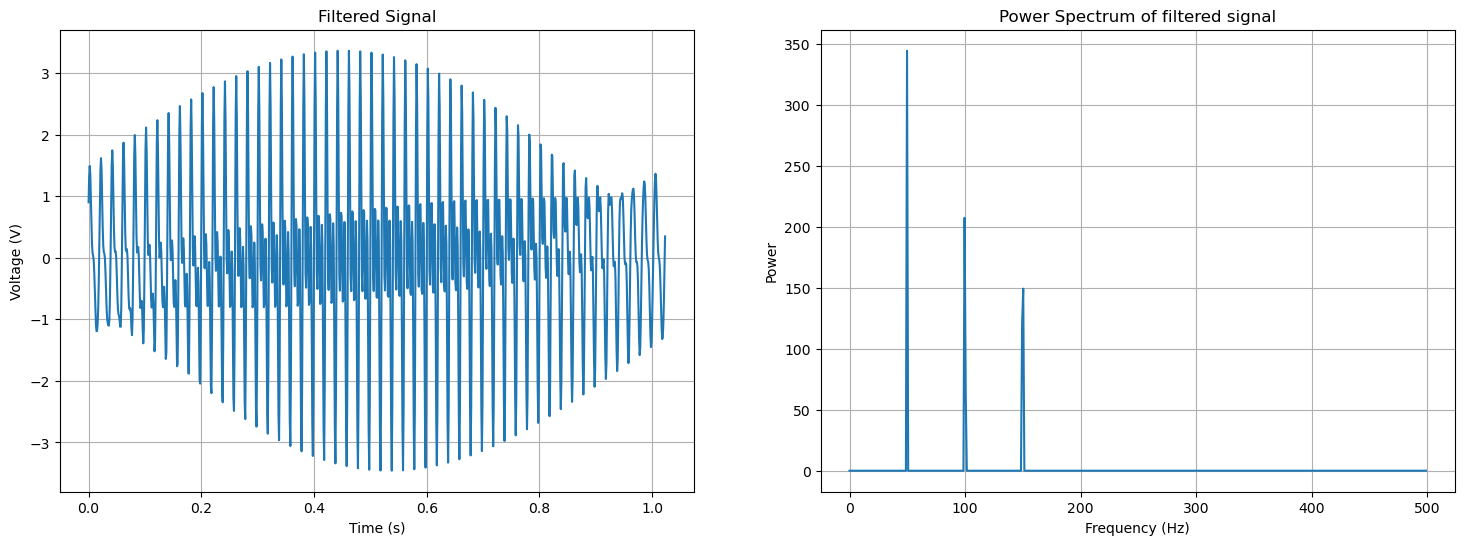

In [10]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.plot(t,ynew.real)
plt.title("Filtered Signal")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.grid()

plt.subplot(1,2,2)
plt.plot(xf, psd2[:nfft//2])
plt.title("Power Spectrum of filtered signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.grid()

#### Filtering 50Hz signal from noisy signal

In [21]:
# import necessary library
from scipy import signal

In [22]:
# Cut-off frequency of lowpass filter fc = 55Hz
fc = 55 
# Sampling frequency 
fs = 1/dt
# Normalize frequency
w = fc / (fs / 2)
# Build 5th order butterworth filter
b, a = signal.butter(5, w, 'low')
# Filter the signal
filtered_signal = signal.filtfilt(b, a, sig)

In [23]:
# FFT Filtered signal
nfft = next_power_of_2(len(filtered_signal))
# Compute FFT
Y_filter = np.fft.fft(filtered_signal, nfft)
# Calculate Power Spectrum Density (Power per frequency)
filter_psd = np.abs(Y_filter * np.conj(Y_filter))/nfft
# Frequency array
xf = np.fft.fftfreq(nfft, dt)[:nfft//2]

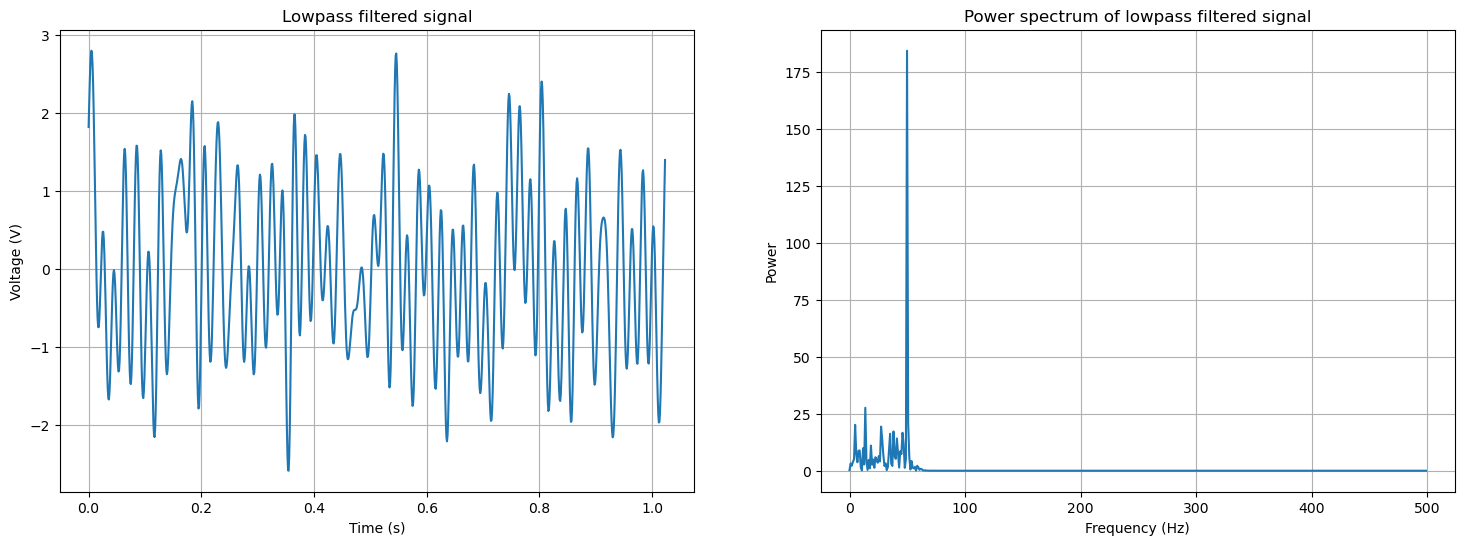

In [24]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.plot(t,filtered_signal)
plt.title("Lowpass filtered signal")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.grid()

plt.subplot(1,2,2)
plt.plot(xf, filter_psd[:nfft//2])
plt.title("Power spectrum of lowpass filtered signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.grid()

In [25]:
# Get index numbers of psd array where power larger than 50.
idx = filter_psd > 50
# Zeros out all frequency components which have power smaller than 50
filtered_psd_clean = filter_psd * idx
Y_filter_new = Y_filter * idx

# Inverse Fourier Transform of clean signal Fourier's coefficient
y_filter_new = np.fft.ifft(Y_filter_new)


In [26]:
# FFT Filtered signal
nfft = next_power_of_2(len(y_filter_new))
# Compute FFT
Y_filter = np.fft.fft(y_filter_new, nfft)
# Calculate Power Spectrum Density (Power per frequency)
filter_psd = np.abs(Y_filter * np.conj(Y_filter))/nfft
# Frequency array
xf = np.fft.fftfreq(nfft, dt)[:nfft//2]

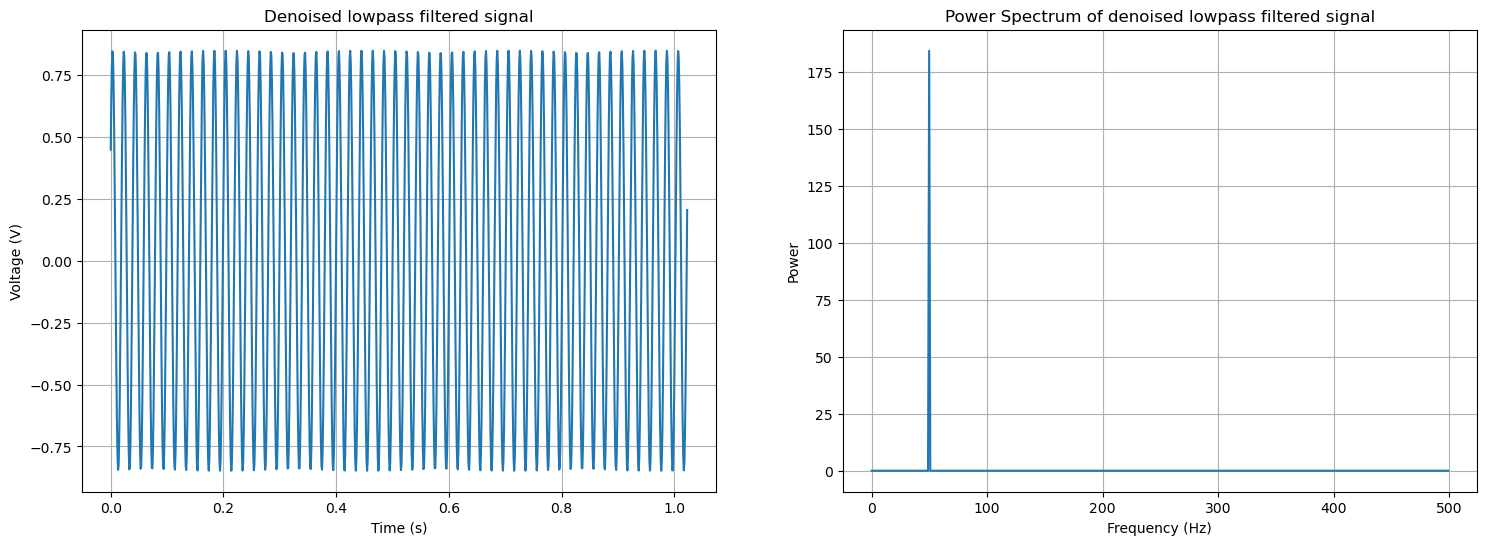

In [27]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.plot(t,y_filter_new.real)
plt.title("Denoised lowpass filtered signal")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.grid()

plt.subplot(1,2,2)
plt.plot(xf, filter_psd[:nfft//2])
plt.title("Power Spectrum of denoised lowpass filtered signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.grid()